In [1]:
#Enable Gpu execution if u're using Google Colab 
#Install Kaggle Library if it s not already installed 
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Get ur key and download kaggle.json the api token from ur account kaggle profile 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Download the dataset using Kaggle Api Since the Dataset is a bit large 
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:00<00:00, 277MB/s]
100% 163M/163M [00:00<00:00, 265MB/s]


In [ ]:
#unzip the compressed dataset
!unzip face-mask-dataset.zip

In [18]:
#Import Depdendencies 
import numpy as np
import os 
from sklearn.model_selection import train_test_split
import cv2 
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf 
from tensorflow import keras

In [3]:
with_mask = os.listdir("/content/data/with_mask")
without_mask = os.listdir("/content/data/without_mask")

In [4]:
print("With Mask Images : ",len(with_mask))
print("Without Mask Images : ",len(without_mask))

With Mask Images :  3725
Without Mask Images :  3828


In [5]:
#Creating labels With_Mask : 1 Without_Mask : 0
labels = [1] * len(with_mask) + [0]*len(without_mask)

In [6]:
print(labels[:5])
print(labels[3724:3729])

[1, 1, 1, 1, 1]
[1, 0, 0, 0, 0]


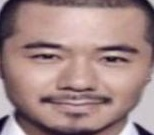

In [7]:
#Displaying Example Without Mask
img_without = cv2.imread('/content/data/without_mask/without_mask_10.jpg')
cv2_imshow(img_without)

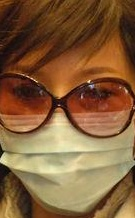

In [8]:
#Displaying Example With Mask
img_without = cv2.imread('/content/data/with_mask/with_mask_10.jpg')
cv2_imshow(img_without)

In [9]:
#Images Preprocessing : Resizing and converting to numpy arrays
X  = []

for img in with_mask : 
  img = Image.open("/content/data/with_mask/"+img)
  img = img.resize((128,128))
  img = img.convert("RGB")
  img = np.array(img)
  X.append(img)
for img in without_mask : 
  img = Image.open("/content/data/without_mask/"+img)
  img = img.resize((128,128))
  img = img.convert("RGB")
  img = np.array(img)
  X.append(img)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
X = np.array(X)
Y = np.array(labels)

In [11]:
print("Data Shape : ",X.shape)
print("Labels Shape : ",Y.shape)

Data Shape :  (7553, 128, 128, 3)
Labels Shape :  (7553,)


In [12]:
#Splitting Training and test Data 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y ,test_size=0.2 , random_state=0)

In [13]:
print("Data Shape : ",X.shape)
print("Training Data Shape : ",X_train.shape)
print("Test Data Shape : ",X_test.shape)

Data Shape :  (7553, 128, 128, 3)
Training Data Shape :  (6042, 128, 128, 3)
Test Data Shape :  (1511, 128, 128, 3)


In [14]:
# Scaling the data Taking Pixel Values from 0-255 to 0-1 
X_train_scaled = X_train / 255

In [15]:
X_test_scaled = X_test / 255

In [16]:
print(X_test_scaled.shape)

(1511, 128, 128, 3)


In [19]:
# Building CNN 
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation ='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation ='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(2, activation ='sigmoid'))

In [20]:
#Compiling The model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['acc'])

In [21]:
#Traning 
hist = model.fit(X_train_scaled,Y_train,epochs = 6, validation_split = 0.1)

Epoch 1/6
170/170 [==============================] - 15s 22ms/step - loss: 0.4713 - acc: 0.7879 - val_loss: 0.2674 - val_acc: 0.8975
Epoch 2/6
170/170 [==============================] - 3s 17ms/step - loss: 0.2988 - acc: 0.8843 - val_loss: 0.2468 - val_acc: 0.9008
Epoch 3/6
170/170 [==============================] - 3s 17ms/step - loss: 0.2259 - acc: 0.9106 - val_loss: 0.2593 - val_acc: 0.8810
Epoch 4/6
170/170 [==============================] - 3s 16ms/step - loss: 0.1974 - acc: 0.9268 - val_loss: 0.2504 - val_acc: 0.8975
Epoch 5/6
170/170 [==============================] - 3s 17ms/step - loss: 0.1574 - acc: 0.9413 - val_loss: 0.2416 - val_acc: 0.9140
Epoch 6/6
170/170 [==============================] - 3s 17ms/step - loss: 0.1337 - acc: 0.9489 - val_loss: 0.2740 - val_acc: 0.9074


In [22]:
#Model on Test Data
loss, acc = model.evaluate(X_test_scaled , Y_test)

48/48 [==============================] - 0s 9ms/step - loss: 0.2256 - acc: 0.9312


*********** Check if the person in your pic is wearing a mask or not ***********
Path to the Image :  /content/test.jpg


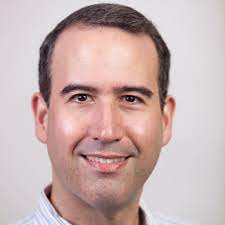

1/1 [==============================] - 0s 22ms/step
[[0.5164486  0.43187034]]
The perso in the pic is not wearing a mask 


In [47]:
#System 
print("*********** Check if the person in your pic is wearing a mask or not ***********")
img_path = input("Path to the Image :  ")

img = cv2.imread(img_path)

cv2_imshow(img)

img = cv2.resize(img ,(128,128))
img = img/255

img = np.reshape(img , [1,128,128,3])

predictions  = model.predict(img)

label = np.argmax(predictions)
print(predictions)
if label == 1 : 
  print("The perso in the pic is wearing a mask with ")
if label == 0 : 
  print("The perso in the pic is not wearing a mask ")